# DeepLabCut Data Analysis and Visualization

This notebook performs an initial exploration of pose estimation data obtained from DeepLabCut (DLC). The goal is to better understand the movement and position patterns before building a machine learning pipeline.

## 1. Load Data

The data consists of 2D coordinates of keypoints tracked over video frames.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

import os
from dotenv import load_dotenv
load_dotenv()
DLC_DATASET_PATH = os.getenv('DLC_DATASET_PATH')

FRAME_RATE = 30
SAMPLE_RATE = 10
MULTI_ANIMAL = False
LIKELIHOOD_THRESHOLD = 0.6
BODY_PARTS = ["tailbase", "earR", "earL", "msBase", "msTop", "centroid", "cleft", "cright"]
RULE_BASED_LABELS = ["shuttles_label_naive1", "shuttles_label_naive2", "shuttles_label_naive3", "shuttles_label_hardcoded", "freezing_label"]
labels = RULE_BASED_LABELS+["other"]

In [20]:
# Multi-level header
df_pose_labels = pd.read_csv(DLC_DATASET_PATH + "/labelled_DLC.csv", header=[0, 1], index_col=0)

# Flatten the multi-level header into single strings
df_pose_labels.columns = ['_'.join(col).strip() for col in df_pose_labels.columns.values]

# Remove second level header if it is empty
df_pose_labels.columns = [col.split("_Unnamed")[0] if "_Unnamed" in col else col for col in df_pose_labels.columns.values]

# Remove NaN columns and rows
df_pose_labels = df_pose_labels.dropna(axis=1, how='all')
df_pose_labels = df_pose_labels.dropna(axis=0, how='any')

print("Shape of df_pose_labels:", df_pose_labels.shape)
df_pose_labels.head()

Shape of df_pose_labels: (20000, 32)


,tailbase_x,tailbase_y,tailbase_likelihood,earR_x,earR_y,earR_likelihood,earL_x,earL_y,earL_likelihood,msBase_x,...,cright_y,cright_likelihood,calc_centroid_x,calc_centroid_y,speed,shuttles_label_naive1,shuttles_label_naive2,shuttles_label_naive3,shuttles_label_hardcoded,freezing_label
0,215.430298,318.572968,0.999996,335.296844,346.048737,0.999918,351.505981,309.215546,0.999891,351.370636,...,345.997833,0.999949,313.400940,326.633553,0.000000,0,0,0,0,0
1,216.124664,319.105774,0.999997,334.252045,349.912659,0.999950,351.527374,307.669678,0.999980,351.550171,...,347.752991,0.999950,313.363564,327.412323,0.779667,0,0,0,0,0
2,215.643936,319.362427,0.999998,333.880310,349.696228,0.999942,351.895233,308.665619,0.999976,352.242249,...,348.114502,0.999924,313.415432,327.838448,0.429270,0,0,0,0,0
3,216.000183,319.383545,0.999997,334.263062,349.323456,0.999920,351.224792,307.465485,0.999981,351.896088,...,347.783112,0.999937,313.346031,327.274757,0.567946,0,0,0,0,0
4,215.784775,319.112488,0.999998,334.187714,349.681763,0.999959,351.621399,307.867065,0.999985,351.576569,...,347.832947,0.999970,313.292614,327.455528,0.188498,0,0,0,0,0


In [21]:
df_labels = df_pose_labels[RULE_BASED_LABELS]

print("Shape of df_labels:", df_labels.shape)
df_labels.head()

Shape of df_labels: (20000, 5)


,shuttles_label_naive1,shuttles_label_naive2,shuttles_label_naive3,shuttles_label_hardcoded,freezing_label
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [22]:
# all unlabeled are placed into "other"
df_labels_other = df_labels.copy()
df_labels_other["other"] = 0

# find all unlabeled
unlabeled_data = df_labels_other.sum(axis=1) == 0

# change all unlabeled to 1 in other
df_labels_other.loc[unlabeled_data, "other"] = 1

print("Shape of df_labels_other:", df_labels_other.shape)
df_labels_other.head()

Shape of df_labels_other: (20000, 6)


,shuttles_label_naive1,shuttles_label_naive2,shuttles_label_naive3,shuttles_label_hardcoded,freezing_label,other
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [23]:
df_pose = df_pose_labels.drop(columns=RULE_BASED_LABELS)

print("Shape of df_pose:", df_pose.shape)
df_pose.head()

Shape of df_pose: (20000, 27)


,tailbase_x,tailbase_y,tailbase_likelihood,earR_x,earR_y,earR_likelihood,earL_x,earL_y,earL_likelihood,msBase_x,...,centroid_likelihood,cleft_x,cleft_y,cleft_likelihood,cright_x,cright_y,cright_likelihood,calc_centroid_x,calc_centroid_y,speed
0,215.430298,318.572968,0.999996,335.296844,346.048737,0.999918,351.505981,309.215546,0.999891,351.370636,...,0.999951,281.177429,278.164520,0.999803,275.792725,345.997833,0.999949,313.400940,326.633553,0.000000
1,216.124664,319.105774,0.999997,334.252045,349.912659,0.999950,351.527374,307.669678,0.999980,351.550171,...,0.999983,281.244598,276.559937,0.999884,277.471069,347.752991,0.999950,313.363564,327.412323,0.779667
2,215.643936,319.362427,0.999998,333.880310,349.696228,0.999942,351.895233,308.665619,0.999976,352.242249,...,0.999982,282.179657,276.486542,0.999849,276.880859,348.114502,0.999924,313.415432,327.838448,0.429270
3,216.000183,319.383545,0.999997,334.263062,349.323456,0.999920,351.224792,307.465485,0.999981,351.896088,...,0.999978,283.015259,276.601379,0.999904,277.634735,347.783112,0.999937,313.346031,327.274757,0.567946
4,215.784775,319.112488,0.999998,334.187714,349.681763,0.999959,351.621399,307.867065,0.999985,351.576569,...,0.999984,282.534119,277.098724,0.999917,276.700134,347.832947,0.999970,313.292614,327.455528,0.188498


In [24]:
df_pose_labels_other = pd.concat([df_pose, df_labels_other], axis=1)

print("Shape of df_pose_labels_other:", df_pose_labels_other.shape)
df_pose_labels_other.head()

Shape of df_pose_labels_other: (20000, 33)


,tailbase_x,tailbase_y,tailbase_likelihood,earR_x,earR_y,earR_likelihood,earL_x,earL_y,earL_likelihood,msBase_x,...,cright_likelihood,calc_centroid_x,calc_centroid_y,speed,shuttles_label_naive1,shuttles_label_naive2,shuttles_label_naive3,shuttles_label_hardcoded,freezing_label,other
0,215.430298,318.572968,0.999996,335.296844,346.048737,0.999918,351.505981,309.215546,0.999891,351.370636,...,0.999949,313.400940,326.633553,0.000000,0,0,0,0,0,1
1,216.124664,319.105774,0.999997,334.252045,349.912659,0.999950,351.527374,307.669678,0.999980,351.550171,...,0.999950,313.363564,327.412323,0.779667,0,0,0,0,0,1
2,215.643936,319.362427,0.999998,333.880310,349.696228,0.999942,351.895233,308.665619,0.999976,352.242249,...,0.999924,313.415432,327.838448,0.429270,0,0,0,0,0,1
3,216.000183,319.383545,0.999997,334.263062,349.323456,0.999920,351.224792,307.465485,0.999981,351.896088,...,0.999937,313.346031,327.274757,0.567946,0,0,0,0,0,1
4,215.784775,319.112488,0.999998,334.187714,349.681763,0.999959,351.621399,307.867065,0.999985,351.576569,...,0.999970,313.292614,327.455528,0.188498,0,0,0,0,0,1


## 2. Basic Info & Summary Statistics

In [25]:
df_pose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tailbase_x           20000 non-null  float64
 1   tailbase_y           20000 non-null  float64
 2   tailbase_likelihood  20000 non-null  float64
 3   earR_x               20000 non-null  float64
 4   earR_y               20000 non-null  float64
 5   earR_likelihood      20000 non-null  float64
 6   earL_x               20000 non-null  float64
 7   earL_y               20000 non-null  float64
 8   earL_likelihood      20000 non-null  float64
 9   msBase_x             20000 non-null  float64
 10  msBase_y             20000 non-null  float64
 11  msBase_likelihood    20000 non-null  float64
 12  msTop_x              20000 non-null  float64
 13  msTop_y              20000 non-null  float64
 14  msTop_likelihood     20000 non-null  float64
 15  centroid_x           20000 non-null  floa

In [26]:
df_pose.describe().T

,count,mean,std,min,25%,50%,75%,max
tailbase_x,20000.0,387.713075,153.660210,69.017937,260.557030,358.448959,526.712326,788.670776
tailbase_y,20000.0,254.462539,68.018463,59.827847,208.120079,259.345657,308.617203,391.764801
tailbase_likelihood,20000.0,0.981936,0.084167,0.004577,0.999474,0.999971,0.999994,1.000000
earR_x,20000.0,388.674316,176.607557,9.667383,258.944054,356.780731,522.892899,821.359802
earR_y,20000.0,266.560390,80.980086,44.658031,211.077774,292.385620,329.222214,424.513489
earR_likelihood,20000.0,0.985140,0.087370,0.008146,0.999368,0.999890,0.999971,1.000000
earL_x,20000.0,393.266979,179.023002,32.378056,267.113480,370.085068,544.096985,830.715149
earL_y,20000.0,263.302823,82.131447,43.581833,209.631668,285.433441,325.312035,436.150269
earL_likelihood,20000.0,0.985476,0.090719,0.005108,0.999636,0.999923,0.999976,1.000000
msBase_x,20000.0,390.333988,182.655025,15.762933,256.992073,368.558289,536.291153,845.399597


In [27]:
# Filter rows where a specific label equals 1
for label in RULE_BASED_LABELS + ["other"]:
    subtable = df_labels_other[df_labels_other[label] == 1]
    print(f"Shape of subtable for {label}: {subtable.shape}")

Shape of subtable for shuttles_label_naive1: (903, 6)
Shape of subtable for shuttles_label_naive2: (1006, 6)
Shape of subtable for shuttles_label_naive3: (415, 6)
Shape of subtable for shuttles_label_hardcoded: (1122, 6)
Shape of subtable for freezing_label: (2209, 6)
Shape of subtable for other: (16010, 6)


In [28]:
# Filter rows where all specified labels are 1
all_shuttles_label_1 = df_labels[
    (df_labels["shuttles_label_naive1"] == 1) &
    (df_labels["shuttles_label_naive2"] == 1) &
    (df_labels["shuttles_label_naive3"] == 1) &
    (df_labels["shuttles_label_hardcoded"] == 1)
]
print(f"Shape of rows where all shuttles labels are 1: {all_shuttles_label_1.shape}")

# Filter rows where any of the specified labels are 1
any_shuttles_label_1 = df_labels[
    (df_labels["shuttles_label_naive1"] == 1) |
    (df_labels["shuttles_label_naive2"] == 1) |
    (df_labels["shuttles_label_naive3"] == 1) |
    (df_labels["shuttles_label_hardcoded"] == 1)
]
print(f"Shape of rows where any shuttles label is 1: {any_shuttles_label_1.shape}")

Shape of rows where all shuttles labels are 1: (80, 5)
Shape of rows where any shuttles label is 1: (1781, 5)


## 3. Filter by Likelihood

Smooths out unreliable keypoint coordinates based on confidence values (likelihoods). This is a "hold last good value" filter to avoid jittery or missing points.

The `adp_filt` function is rewrite from the `adp_filt` function in A-SOiD (likelihood adaptive filtering).

In [29]:
# likelihood adaptive filtering
def adp_filt(df_pose_labels_other, idx_coord, idx_llh, llh_value, labels):
    """
    For body parts with likelihood values below the threshold, copy the previous valid row's x, y coordinates.
    Labels are not modified during filtering and are set back after filtering.

    Parameters:
        df_pose_labels_other (pd.DataFrame): The input DataFrame containing x, y, likelihood, and pose labels.
        idx_coord (list): Indices of selected body parts (x and y columns).
        idx_llh (list): Indices of likelihood columns.
        llh_value (float): Threshold for likelihood filtering.
        labels (list): List of pose labels to retain in the output.

    Returns:
        pd.DataFrame: DataFrame with invalid x, y coordinates corrected.
        dict: Statistics on filtered body parts and likelihood values below the threshold.
    """
    # Convert DataFrame to numpy arrays for x, y, likelihood, and pose labels
    data_x_coord = np.array(df_pose_labels_other.iloc[:, idx_coord[::2]])
    data_y_coord = np.array(df_pose_labels_other.iloc[:, idx_coord[1::2]])
    data_llh = np.array(df_pose_labels_other.iloc[:, idx_llh])
    original_labels = df_pose_labels_other[labels].copy()  # Preserve original labels

    # Initialize statistics
    llh_below_threshold = 0
    total_llh = data_llh.size  # Total number of likelihood values
    body_part_stats = {df_pose_labels_other.columns[idx_coord[::2][i]]: 0 for i in range(len(idx_coord[::2]))}

    # Iterate through body parts and correct invalid x, y coordinates
    for x in range(data_llh.shape[1]):  # Iterate over each body part
        for i in range(1, data_llh.shape[0]):  # Start from the second row
            if data_llh[i, x] < llh_value:  # If likelihood is below the threshold
                llh_below_threshold += 1
                body_part_stats[df_pose_labels_other.columns[idx_coord[::2][x]]] += 1
                # Copy the previous row's x, y coordinates for this body part
                data_x_coord[i, x] = data_x_coord[i - 1, x]
                data_y_coord[i, x] = data_y_coord[i - 1, x]

    # Replace the x, y columns in the DataFrame with corrected values
    for idx, col_idx in enumerate(idx_coord[::2]):  # Update x columns
        df_pose_labels_other.iloc[:, col_idx] = data_x_coord[:, idx]
    for idx, col_idx in enumerate(idx_coord[1::2]):  # Update y columns
        df_pose_labels_other.iloc[:, col_idx] = data_y_coord[:, idx]

    # Restore the original labels
    df_pose_labels_other[labels] = original_labels

    # Calculate likelihood ratio
    llh_ratio = llh_below_threshold / total_llh

    # Prepare statistics
    stats = {
        "llh_below_threshold": llh_below_threshold,
        "total_llh": total_llh,
        "llh_below_threshold_ratio": llh_ratio,
        "body_part_stats": body_part_stats
    }

    return df_pose_labels_other, stats

In [30]:
# Get numeric indices of columns ending with "_likelihood"
idx_llh = [i for i, col in enumerate(df_pose_labels_other.columns) if col.endswith("_likelihood")]
labels = RULE_BASED_LABELS+["other"]
# Get numeric indices of columns of x and y coordinates
idx_coord = [i for i, col in enumerate(df_pose_labels_other.columns) if not col.endswith("_likelihood") and col not in labels]

filt_df_pose_labels_other, stats = adp_filt(
    df_pose_labels_other=df_pose_labels_other,
    idx_coord=idx_coord,
    idx_llh=idx_llh,
    llh_value=LIKELIHOOD_THRESHOLD,
    labels=labels
)

print("Filtered DataFrame's shape:")
print(filt_df_pose_labels_other.shape)
print("\nStatistics:")
print(stats)

Filtered DataFrame's shape:
(20000, 33)

Statistics:
{'llh_below_threshold': 1658, 'total_llh': 160000, 'llh_below_threshold_ratio': 0.0103625, 'body_part_stats': {'tailbase_x': 287, 'earR_x': 261, 'earL_x': 258, 'msBase_x': 279, 'msTop_x': 284, 'centroid_x': 14, 'cleft_x': 158, 'cright_x': 117, 'calc_centroid_x': 0, 'speed': 0}}


In [31]:
filt_df_pose = filt_df_pose_labels_other.drop(columns=RULE_BASED_LABELS + ["other"])

print("Filtered DataFrame's shape without labels:")
print(filt_df_pose.shape)
filt_df_pose.head()

Filtered DataFrame's shape without labels:
(20000, 27)


,tailbase_x,tailbase_y,tailbase_likelihood,earR_x,earR_y,earR_likelihood,earL_x,earL_y,earL_likelihood,msBase_x,...,centroid_likelihood,cleft_x,cleft_y,cleft_likelihood,cright_x,cright_y,cright_likelihood,calc_centroid_x,calc_centroid_y,speed
0,215.430298,318.572968,0.999996,335.296844,346.048737,0.999918,351.505981,309.215546,0.999891,351.370636,...,0.999951,281.177429,278.164520,0.999803,275.792725,345.997833,0.999949,313.400940,326.633553,0.000000
1,216.124664,319.105774,0.999997,334.252045,349.912659,0.999950,351.527374,307.669678,0.999980,351.550171,...,0.999983,281.244598,276.559937,0.999884,277.471069,347.752991,0.999950,313.363564,327.412323,0.779667
2,215.643936,319.362427,0.999998,333.880310,349.696228,0.999942,351.895233,308.665619,0.999976,352.242249,...,0.999982,282.179657,276.486542,0.999849,276.880859,348.114502,0.999924,313.415432,327.838448,0.429270
3,216.000183,319.383545,0.999997,334.263062,349.323456,0.999920,351.224792,307.465485,0.999981,351.896088,...,0.999978,283.015259,276.601379,0.999904,277.634735,347.783112,0.999937,313.346031,327.274757,0.567946
4,215.784775,319.112488,0.999998,334.187714,349.681763,0.999959,351.621399,307.867065,0.999985,351.576569,...,0.999984,282.534119,277.098724,0.999917,276.700134,347.832947,0.999970,313.292614,327.455528,0.188498


In [32]:
filt_df_labels_other = filt_df_pose_labels_other[RULE_BASED_LABELS + ["other"]]

print("Filtered DataFrame's shape with labels:")
print(filt_df_labels_other.shape)
filt_df_labels_other.head()

Filtered DataFrame's shape with labels:
(20000, 6)


,shuttles_label_naive1,shuttles_label_naive2,shuttles_label_naive3,shuttles_label_hardcoded,freezing_label,other
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


## 4. Visualize Keypoint Trajectory Over Time

Pick one keypoint and look at its X and Y coordinates over frames.

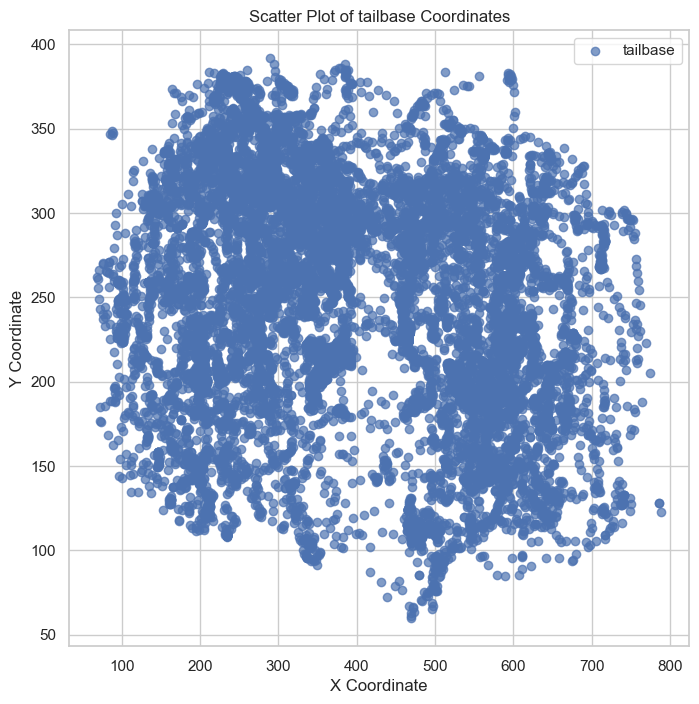

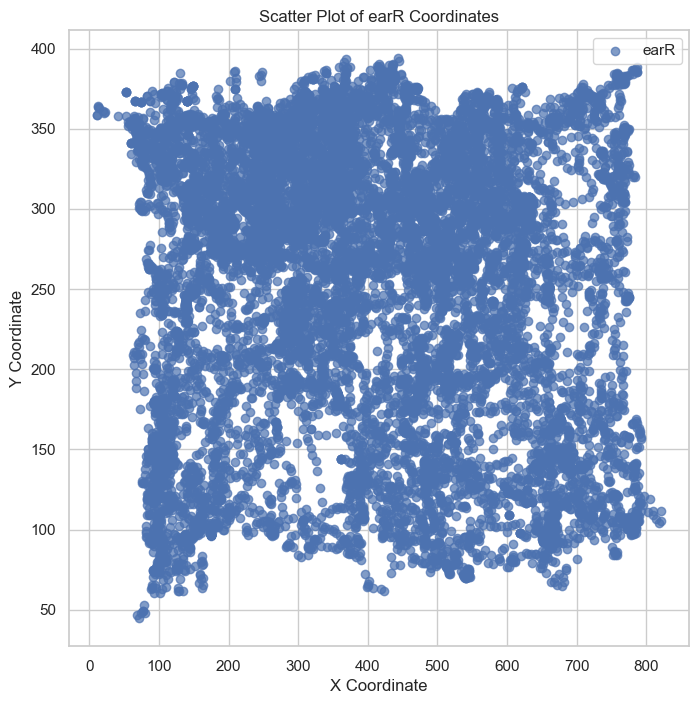

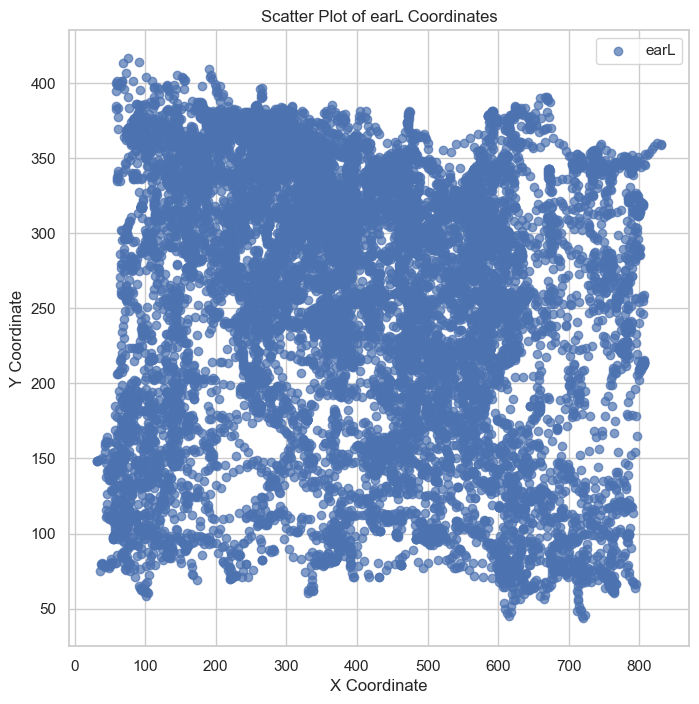

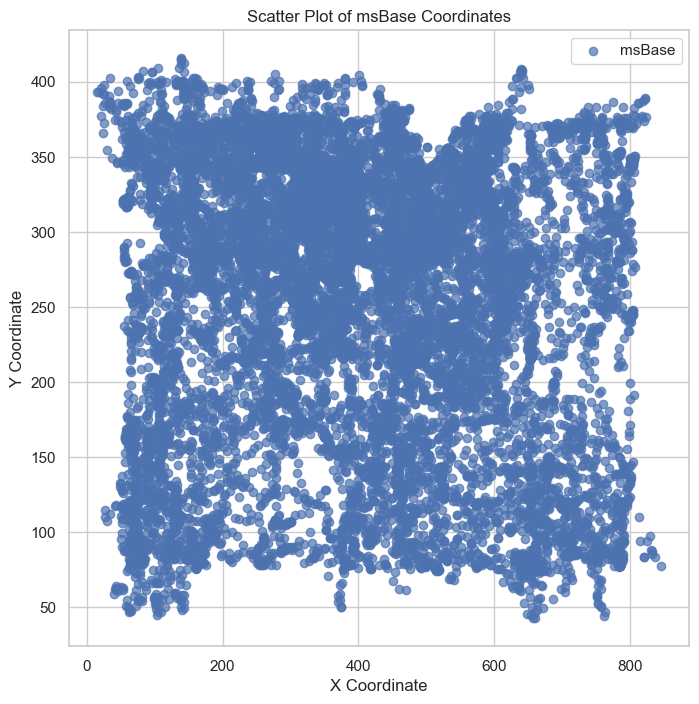

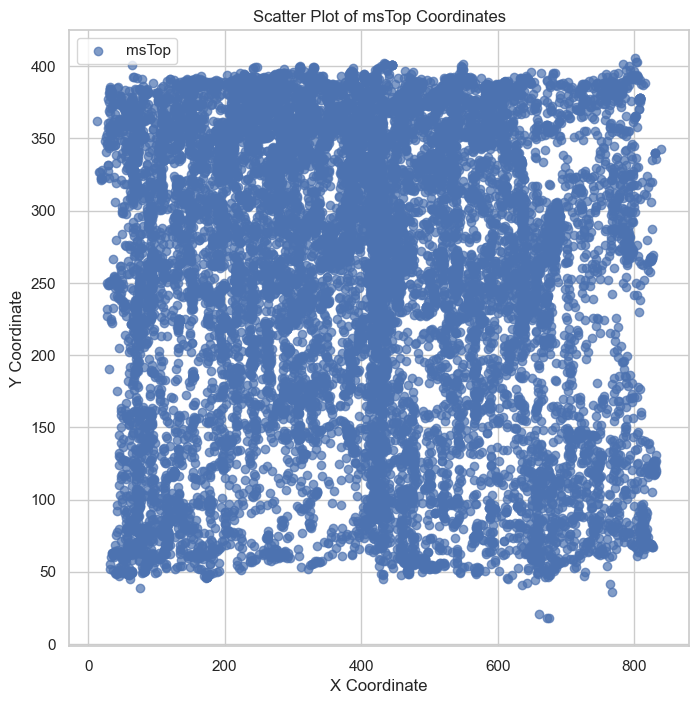

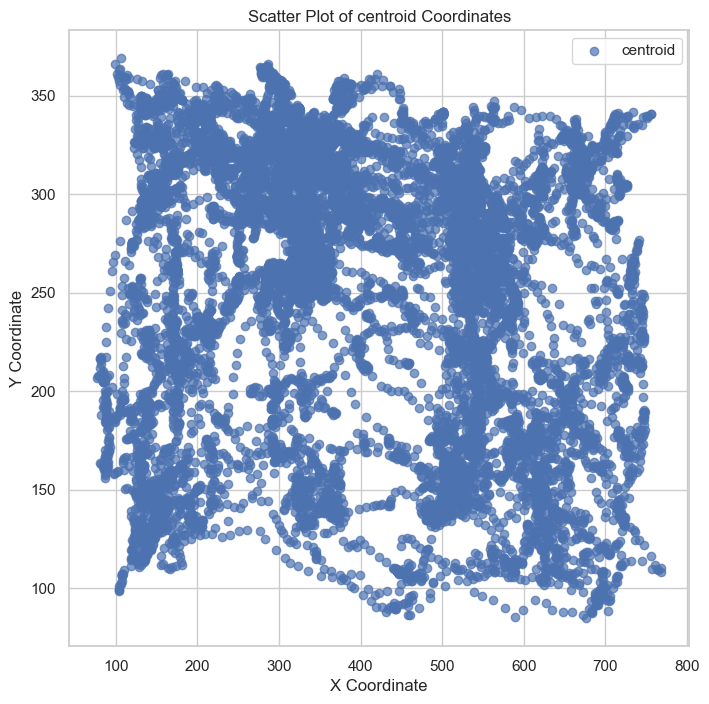

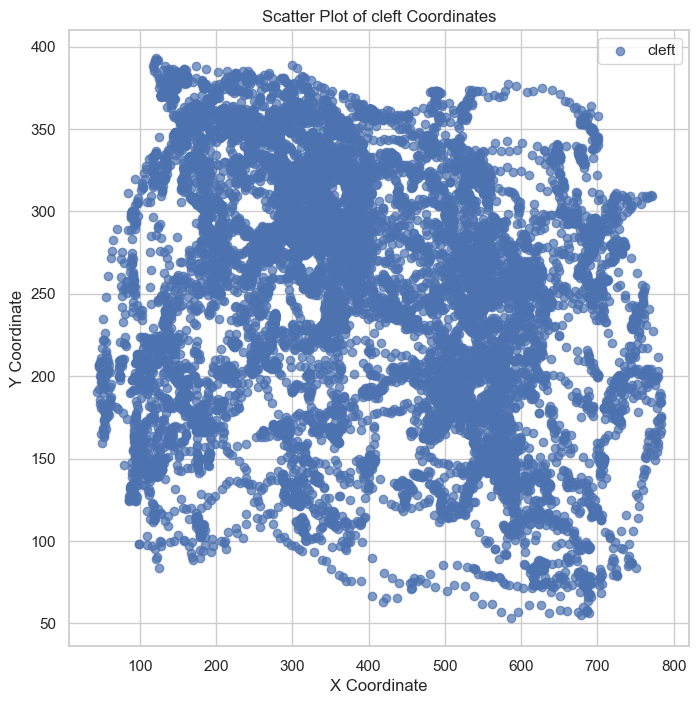

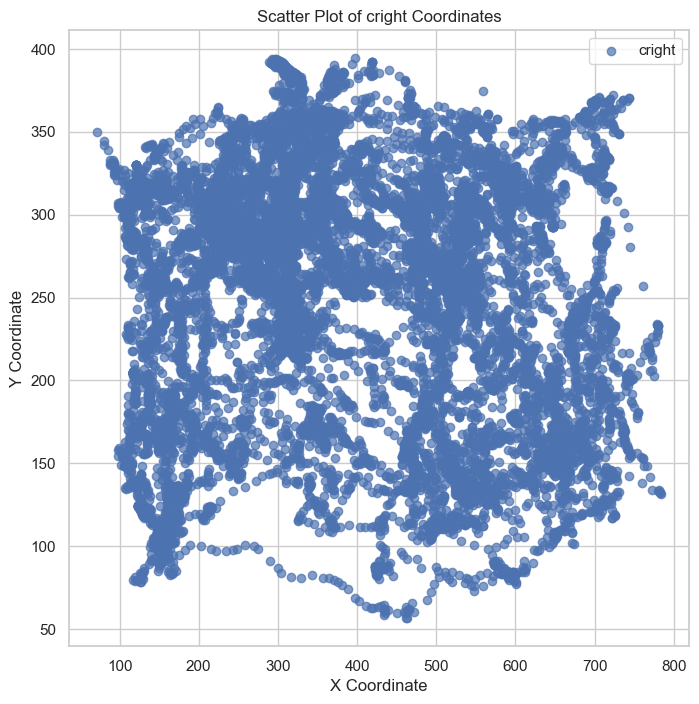

In [33]:
for keypoint in BODY_PARTS:
    x_coords = filt_df_pose[f"{keypoint}_x"]
    y_coords = filt_df_pose[f"{keypoint}_y"]

    plt.figure(figsize=(8, 8))

    plt.scatter(x_coords, y_coords, label=f"{keypoint}", alpha=0.7)

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(f"Scatter Plot of {keypoint} Coordinates")
    plt.legend()
    plt.grid(True)

    plt.show()

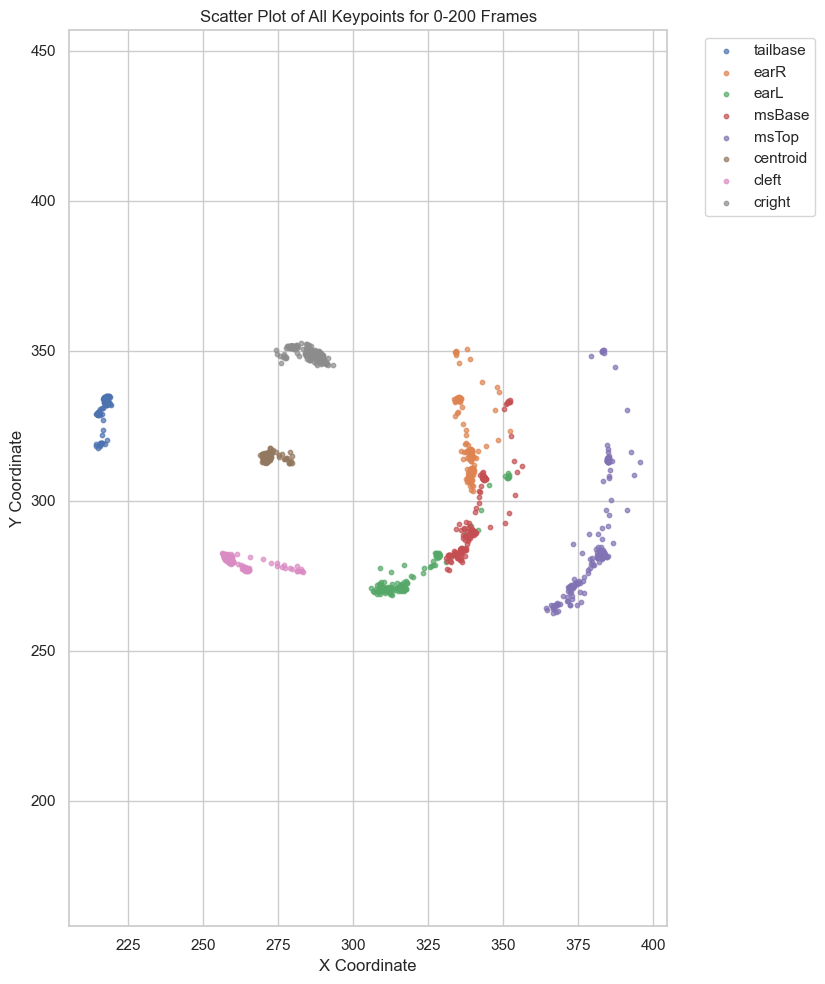

In [34]:
start_frame = 0
num_frames_to_plot =  200

end_frame = start_frame + num_frames_to_plot
max_available_frames = len(filt_df_pose)
if end_frame > max_available_frames:
    end_frame = max_available_frames
    
plt.figure(figsize=(10, 10))

for keypoint in BODY_PARTS:
    x_col = f"{keypoint}_x"
    y_col = f"{keypoint}_y"
    if x_col in filt_df_pose.columns and y_col in filt_df_pose.columns:
        x_coords = filt_df_pose[x_col].iloc[start_frame:end_frame]
        y_coords = filt_df_pose[y_col].iloc[start_frame:end_frame]

        # Plot all keypoints on the *same* figure
        plt.scatter(x_coords, y_coords, label=f"{keypoint}", alpha=0.7, s=10) # s adjusts point size

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title(f"Scatter Plot of All Keypoints for {start_frame}-{end_frame} Frames")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.axis('equal') # Often useful for spatial data to ensure aspect ratio is 1:1
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [49]:
# Group continuous rows with continuous 1s for each label
grouped_subtables = {}

for label in RULE_BASED_LABELS + ["other"]:
    # Create a group identifier for continuous 1s
    filt_df_pose_labels_other['group'] = (
        (filt_df_pose_labels_other[label] != filt_df_pose_labels_other[label].shift())
        .cumsum()
    )
    
    # Filter groups where the label is 1
    grouped = filt_df_pose_labels_other[filt_df_pose_labels_other[label] == 1].groupby('group')
    
    # Save each group as a subtable
    grouped_subtables[label] = [group for _, group in grouped]

# Example: Print the number of groups and the first group for each label
for label, subtables in grouped_subtables.items():
    print(f"Label: {label}, Number of groups: {len(subtables)}")
    if subtables:
        #print(f"First group size for {label}:\n", subtables[0].shape)
        all_group_shape = [subtable.shape for subtable in subtables]
        print(f"All group size for {label}:\n", all_group_shape)
        print("---------------------------")

Label: shuttles_label_naive1, Number of groups: 25
All group size for shuttles_label_naive1:
 [(4, 34), (42, 34), (40, 34), (40, 34), (40, 34), (40, 34), (45, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (5, 34), (23, 34), (40, 34), (40, 34), (40, 34), (24, 34)]
---------------------------
Label: shuttles_label_naive2, Number of groups: 28
All group size for shuttles_label_naive2:
 [(4, 34), (40, 34), (40, 34), (43, 34), (1, 34), (40, 34), (40, 34), (25, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (40, 34), (29, 34), (40, 34), (40, 34), (40, 34), (24, 34)]
---------------------------
Label: shuttles_label_naive3, Number of groups: 22
All group size for shuttles_label_naive3:
 [(6, 34), (20, 34), (23, 34), (21, 34), (20, 34), (20, 34), (20, 34), (20, 34), (20, 34), (20, 34), (20, 34), (20, 34), (20, 34), (20,

In [50]:
# Function to plot all keypoints for a specific group of a label
def plot_keypoints_for_group(label, group_index):
    if label not in grouped_subtables:
        print(f"Label '{label}' not found in grouped_subtables.")
        return
    
    if group_index >= len(grouped_subtables[label]) or group_index < 0:
        print(f"Invalid group index for label '{label}'. Available groups: 0 to {len(grouped_subtables[label]) - 1}")
        return
    
    # Get the specified group
    group = grouped_subtables[label][group_index]
    print(f"Plotting group {group_index} for label '{label}' with shape: {group.shape}")
    
    # Plot all keypoints for the group
    plt.figure(figsize=(10, 10))
    for keypoint in BODY_PARTS:
        x_col = f"{keypoint}_x"
        y_col = f"{keypoint}_y"
        if x_col in group.columns and y_col in group.columns:
            x_coords = group[x_col]
            y_coords = group[y_col]
            plt.scatter(x_coords, y_coords, label=keypoint, alpha=0.7, s=10)
    
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title(f"Keypoints for '{label}', Group {group_index}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.axis('equal')  # Ensure aspect ratio is 1:1
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

Label: shuttles_label_naive1
Plotting group 2 for label 'shuttles_label_naive1' with shape: (40, 34)


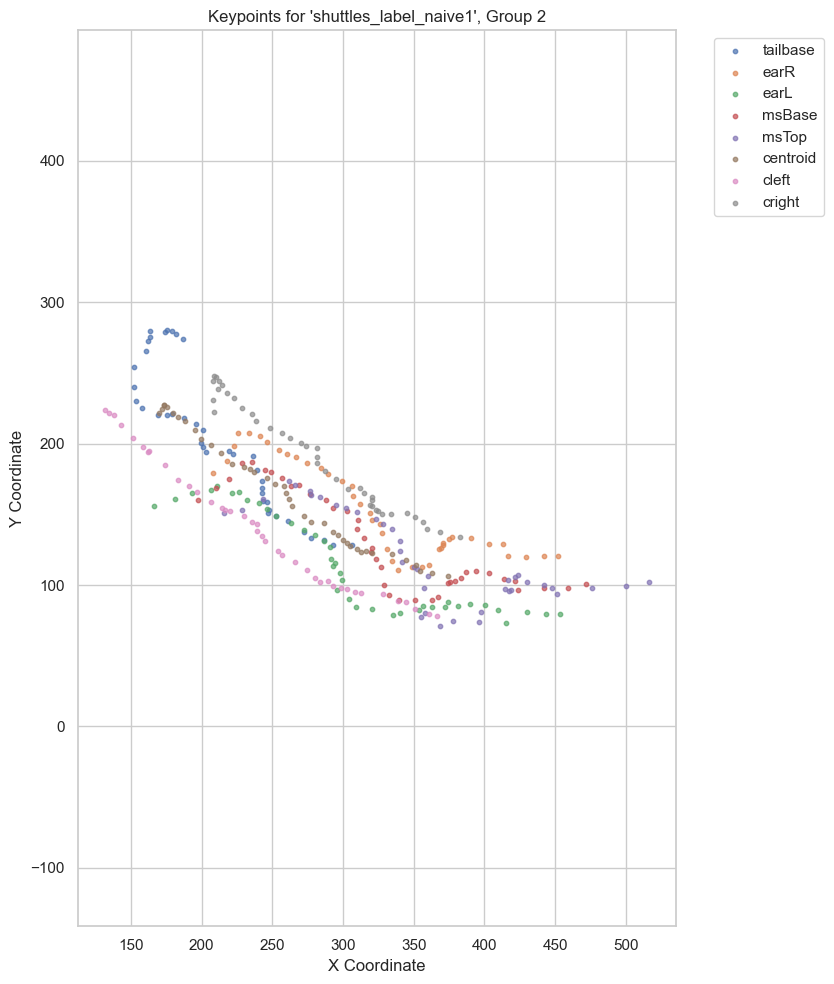

Label: shuttles_label_naive2
Plotting group 2 for label 'shuttles_label_naive2' with shape: (40, 34)


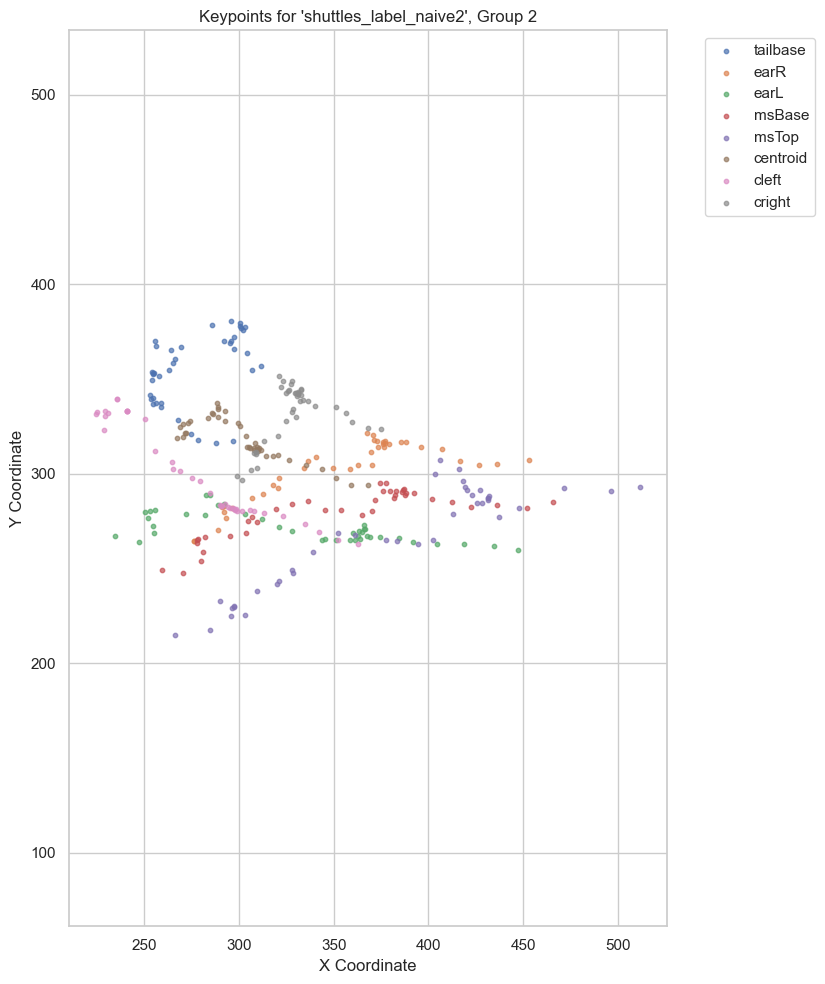

Label: shuttles_label_naive3
Plotting group 2 for label 'shuttles_label_naive3' with shape: (23, 34)


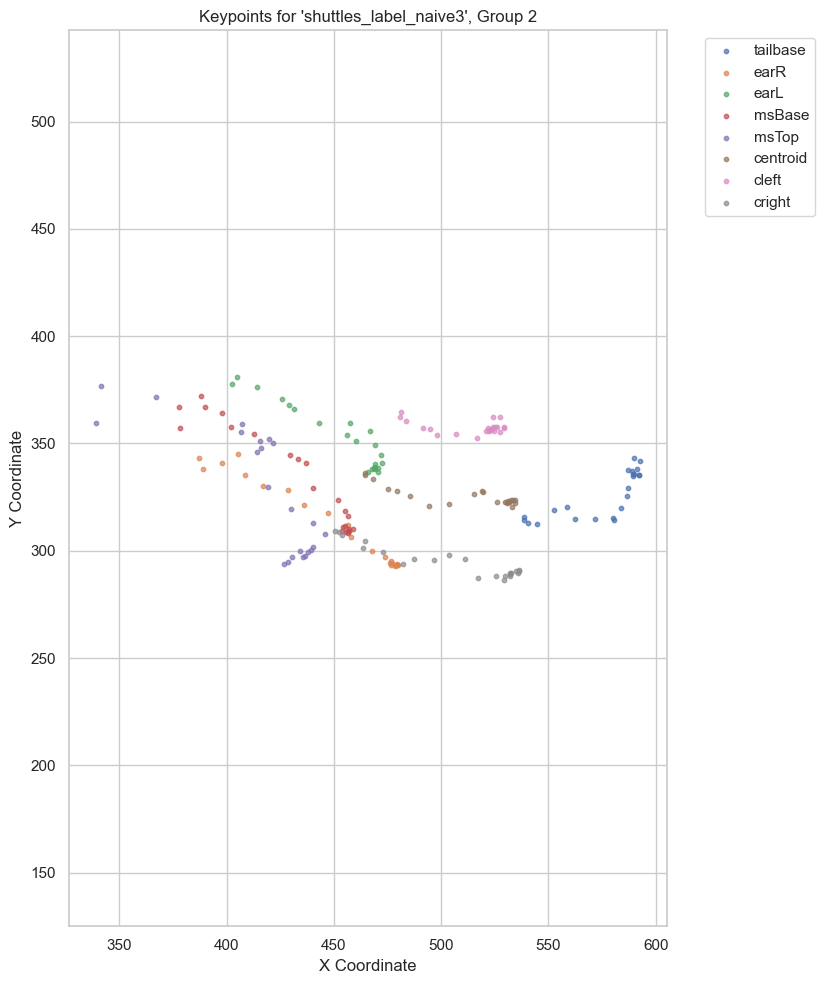

Label: shuttles_label_hardcoded
Plotting group 2 for label 'shuttles_label_hardcoded' with shape: (59, 34)


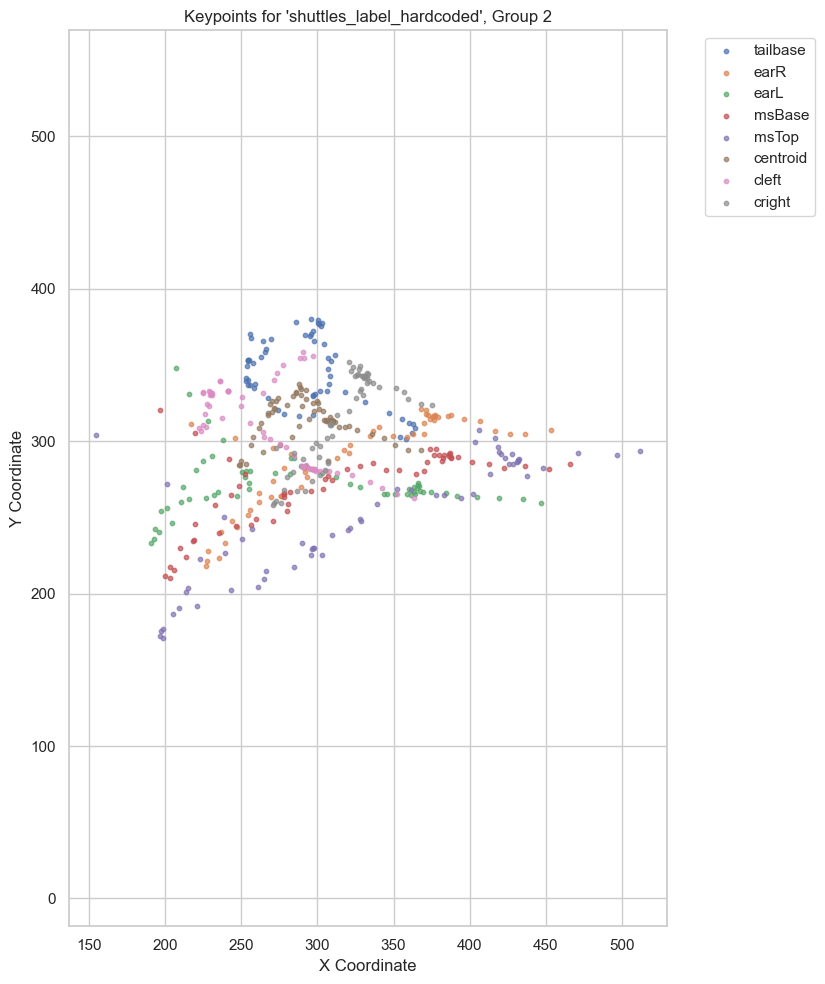

Label: freezing_label
Plotting group 2 for label 'freezing_label' with shape: (57, 34)


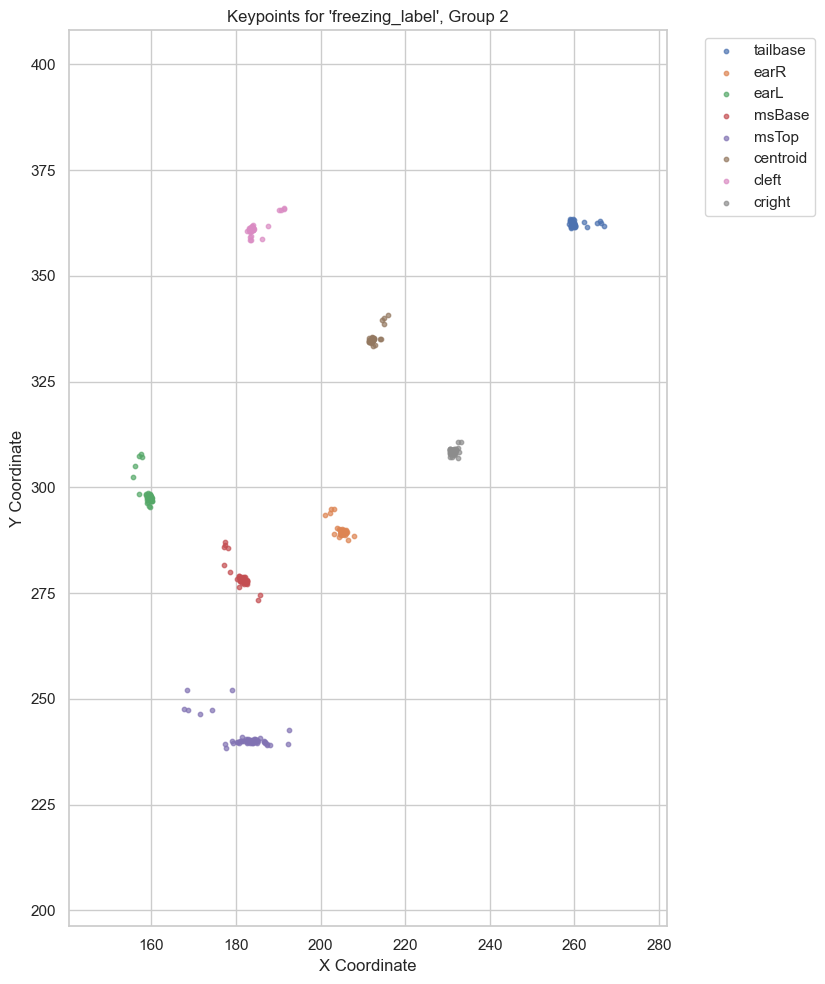

Label: other
Plotting group 2 for label 'other' with shape: (198, 34)


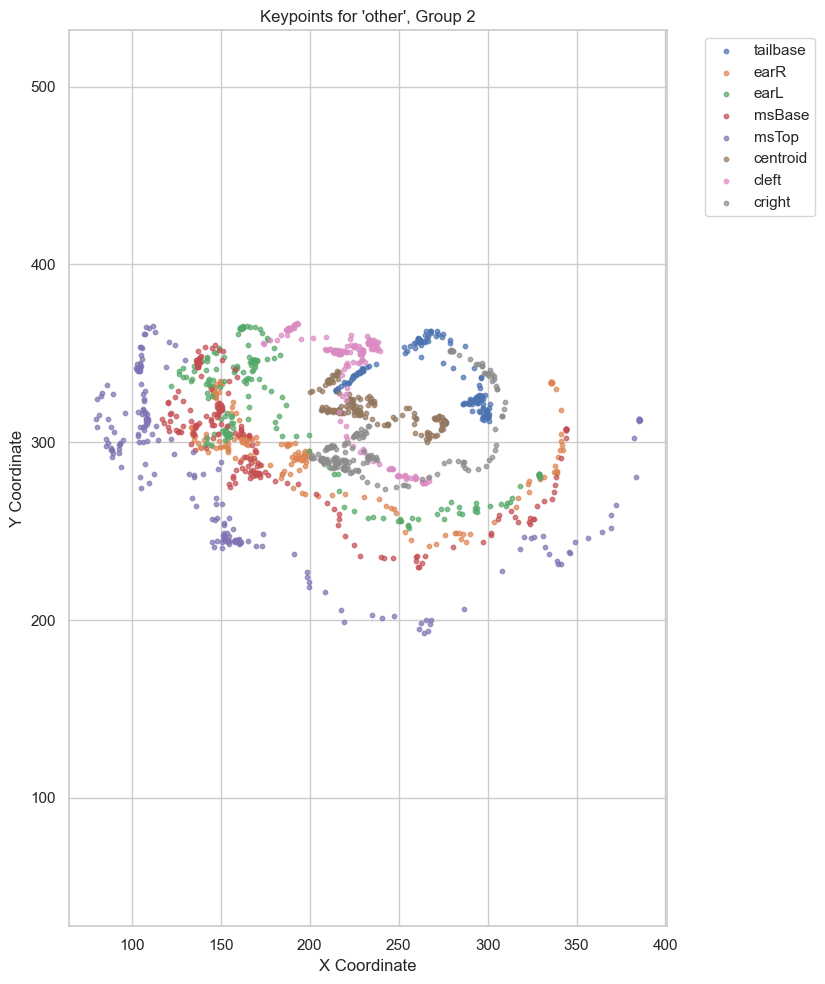

In [51]:
for label in labels:
    print(f"Label: {label}")
    label_to_plot = label
    group_index_to_plot = 2
    plot_keypoints_for_group(label_to_plot, group_index_to_plot)

## 5. Correlation Between Keypoints

This heatmap shows how X/Y positions of keypoints correlate with each other.

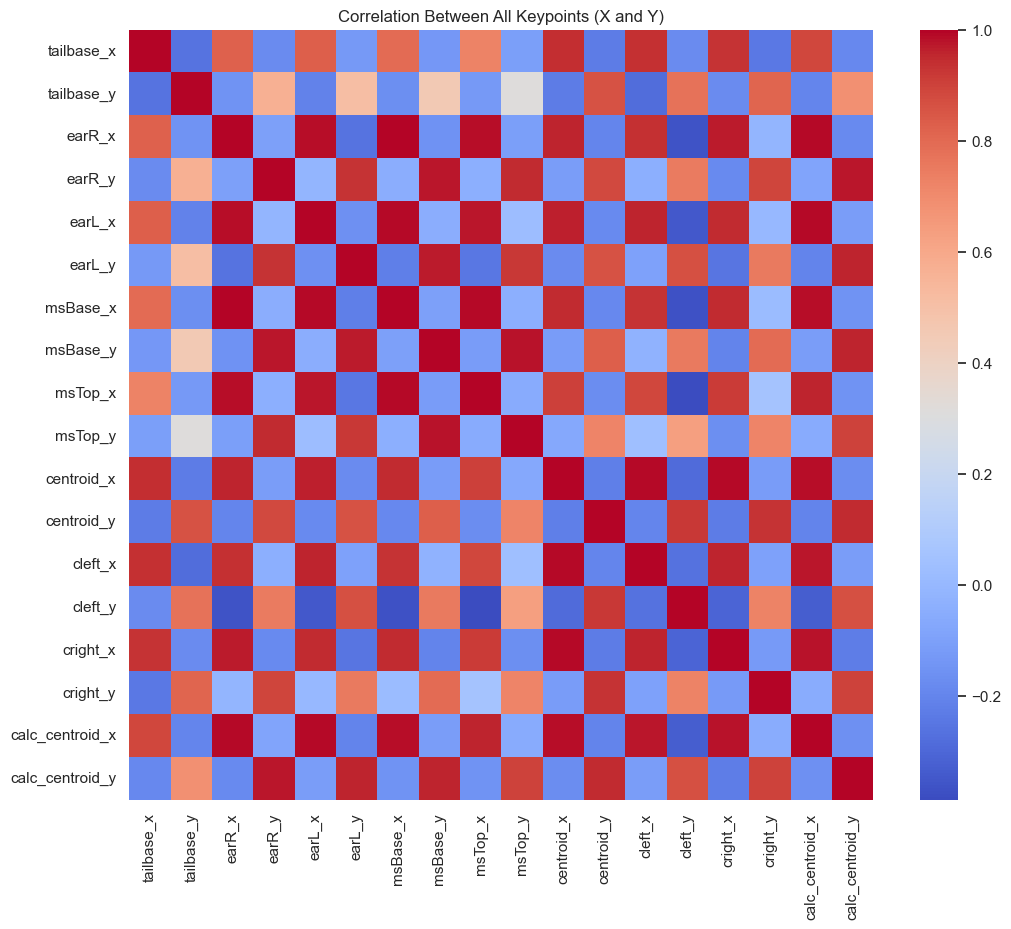

In [55]:
# Select all keypoint columns
keypoint_columns = [col for col in df_pose.columns if any(bp in col for bp in BODY_PARTS) and not col.endswith("_likelihood")]
df_keypoints = df_pose[keypoint_columns]

# Compute and plot correlation for all keypoints
correlation_matrix = df_keypoints.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Between All Keypoints (X and Y)")
plt.show()

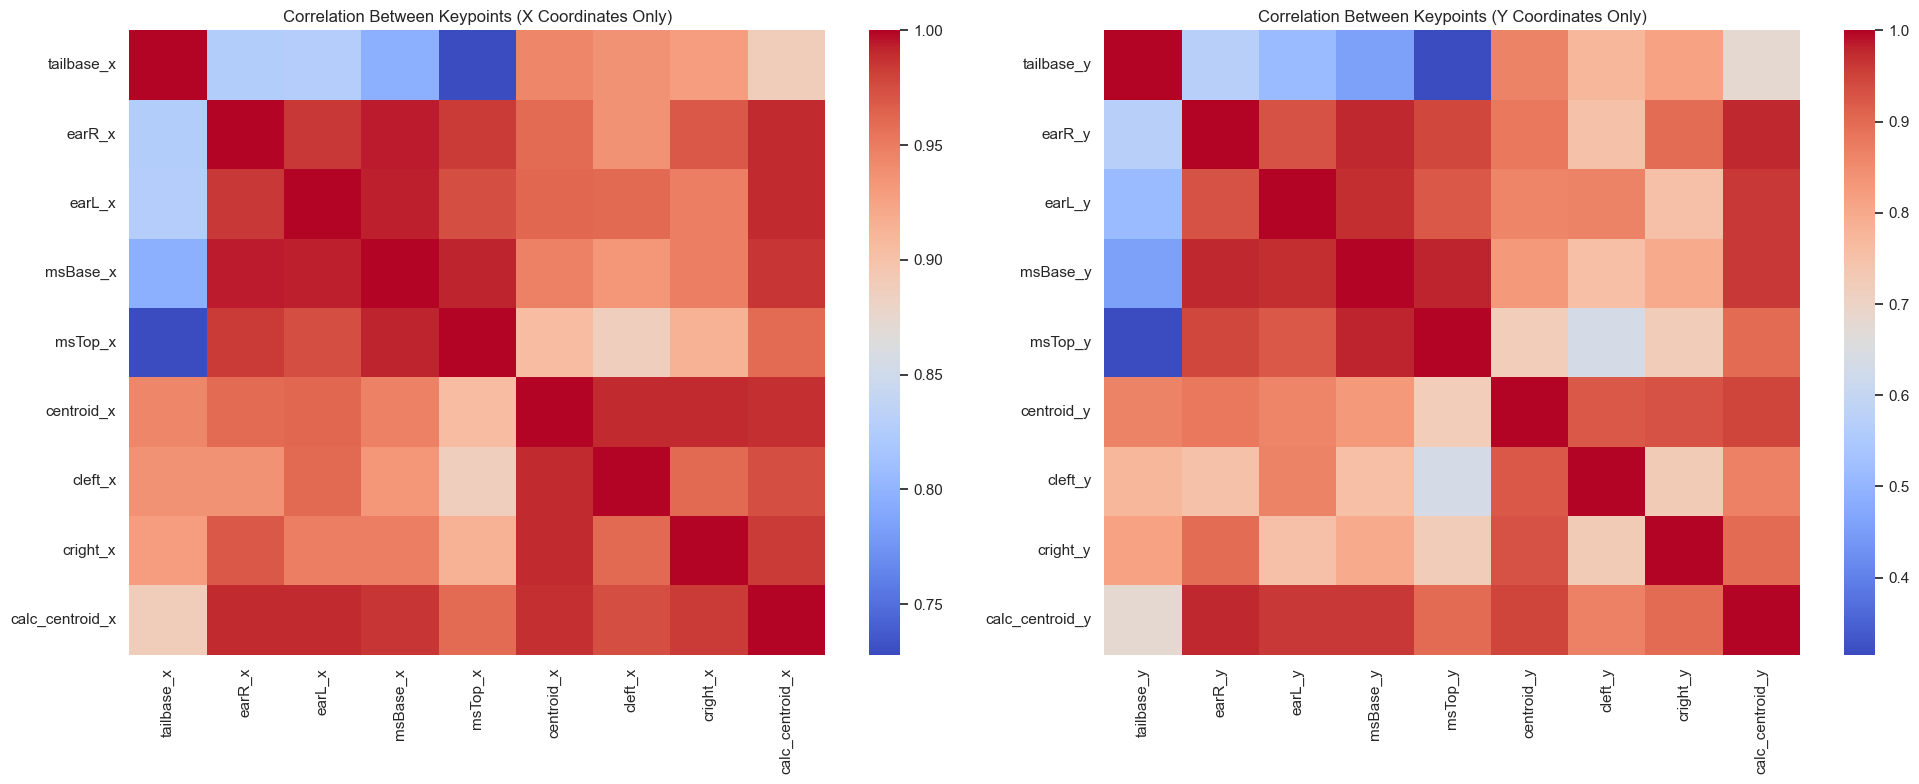

In [ ]:
# Select only X-coordinate columns
x_columns = [col for col in df_pose.columns if col.endswith("_x")]
df_keypoints_x = df_pose[x_columns]

# Select only Y-coordinate columns
y_columns = [col for col in df_pose.columns if col.endswith("_y")]
df_keypoints_y = df_pose[y_columns]

# Compute correlation matrices
correlation_matrix_x = df_keypoints_x.corr()
correlation_matrix_y = df_keypoints_y.corr()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot X-coordinate correlation heatmap
sns.heatmap(correlation_matrix_x, annot=False, cmap="coolwarm", fmt=".2f", cbar=True, ax=axes[0])
axes[0].set_title("Correlation Between Keypoints (X Coordinates Only)")

# Plot Y-coordinate correlation heatmap
sns.heatmap(correlation_matrix_y, annot=False, cmap="coolwarm", fmt=".2f", cbar=True, ax=axes[1])
axes[1].set_title("Correlation Between Keypoints (Y Coordinates Only)")

plt.tight_layout()
plt.show()

## 6. Distance Between Keypoints

Compute and visualize the distance between a few keypoints (e.g., snout and tailbase).

## 7. Keypoint Speed Estimation

Estimate speed by calculating the displacement between frames.